In [1]:
from heat_pinn import *
TIMER_REPEAT_TIMES = 10


Using backend: tensorflow.compat.v1

2021-12-12 18:45:02.611891: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Instructions for updating:
non-resource variables are not supported in the long term






train_bc_points shape (240, 2)
train_next_batch shape (3020, 2)
Compiling model...
Building feed-forward neural network...
'build' took 0.027942 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.206611 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [7.80e-02, 4.23e-02, 4.06e-01]    [7.71e-02, 4.23e-02, 4.06e-01]    []  


2021-12-12 18:45:07.704876: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)
2021-12-12 18:45:07.728943: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3593250000 Hz


1000      [4.83e-04, 2.65e-04, 1.14e-04]    [2.88e-04, 2.65e-04, 1.14e-04]    []  
2000      [1.22e-04, 4.44e-05, 1.70e-05]    [9.66e-05, 4.44e-05, 1.70e-05]    []  
3000      [4.85e-05, 2.60e-05, 9.91e-06]    [3.57e-05, 2.60e-05, 9.91e-06]    []  
4000      [3.49e-05, 1.66e-05, 6.20e-06]    [2.55e-05, 1.66e-05, 6.20e-06]    []  
5000      [2.67e-05, 1.05e-05, 4.23e-06]    [1.95e-05, 1.05e-05, 4.23e-06]    []  
6000      [2.13e-05, 6.47e-06, 2.88e-06]    [1.55e-05, 6.47e-06, 2.88e-06]    []  
7000      [1.78e-05, 4.04e-06, 1.97e-06]    [1.28e-05, 4.04e-06, 1.97e-06]    []  
8000      [1.54e-05, 2.64e-06, 1.38e-06]    [1.10e-05, 2.64e-06, 1.38e-06]    []  
9000      [1.38e-05, 1.84e-06, 9.87e-07]    [9.75e-06, 1.84e-06, 9.87e-07]    []  
10000     [4.97e-05, 2.76e-06, 1.13e-05]    [3.77e-05, 2.76e-06, 1.13e-05]    []  
11000     [1.13e-05, 1.12e-06, 5.73e-07]    [8.20e-06, 1.12e-06, 5.73e-07]    []  
12000     [2.66e-05, 1.70e-06, 2.73e-06]    [2.19e-05, 1.70e-06, 2.73e-06]    []  
1300

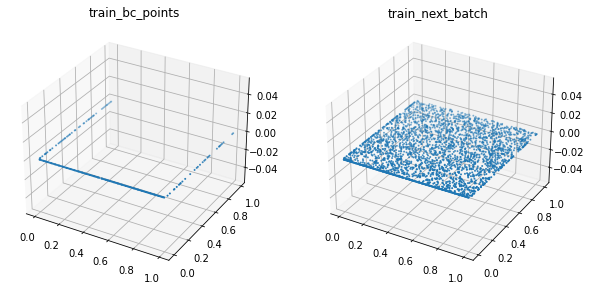

In [2]:
# Train best PINN model
const_params = PinnConstParam()
test_params = PinnTestParam()

geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)
losshistory, train_state = train_model(model)


heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0001 seconds
finite_difference_crank_nicolson: Average time with 25 tries: 0.0016 seconds
PINN prediction: Average time with 25 tries: 0.0008 seconds
---Performance measured wrt analytical solution---
Mean residual: 0.3352851
L2 relative error: 0.0005661465287311384
--- Report ---
Mean absolute error:  0.00010609846082298387
Mean squared error:  2.0202444253063332e-08
Max error:  0.000700786709785357
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 30
test_t_dim: 100
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson



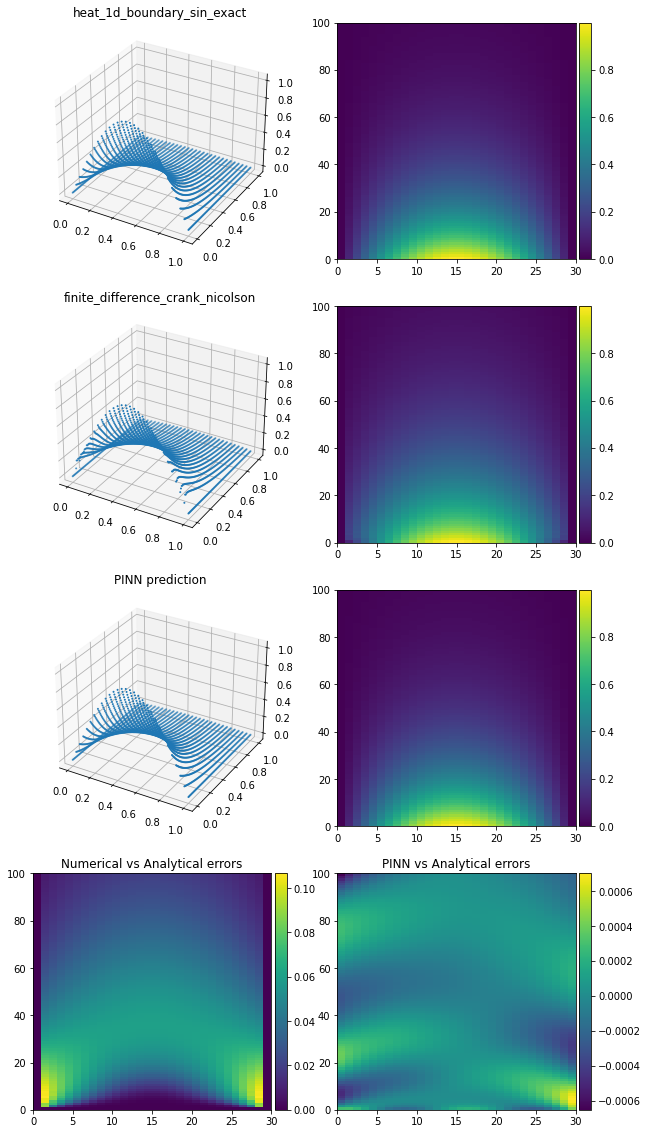

In [3]:
# Find some good numerical solution

const_params.test_x_dim = 30
const_params.test_t_dim = 100
const_params.numerical_function_name = "finite_difference_crank_nicolson"

solve_analytical_and_numerical(const_params)
predict_and_output_report(const_params, model)


heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0005 seconds
finite_difference_crank_nicolson: Average time with 25 tries: 0.0280 seconds
PINN prediction: Average time with 25 tries: 0.0014 seconds
---Performance measured wrt analytical solution---
Mean residual: 0.3454099
L2 relative error: 0.0005342442577761722
--- Report ---
Mean absolute error:  0.00010248035513488802
Mean squared error:  1.851707061723646e-08
Max error:  0.000700786709785357
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 200
test_t_dim: 100
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson



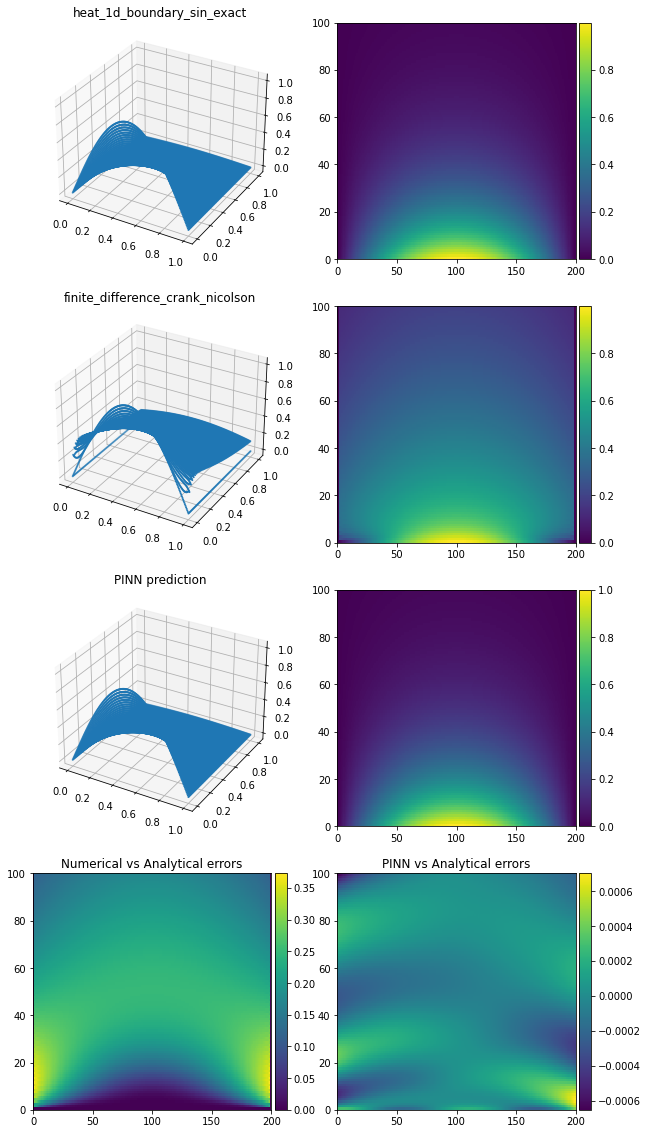

In [4]:
# Find bad numerical solution

const_params.test_x_dim = 200
const_params.test_t_dim = 100
const_params.numerical_function_name = "finite_difference_crank_nicolson"

solve_analytical_and_numerical(const_params)
predict_and_output_report(const_params, model)


heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0068 seconds
finite_difference_crank_nicolson: Average time with 25 tries: 0.6041 seconds
PINN prediction: Average time with 25 tries: 0.0207 seconds
---Performance measured wrt analytical solution---
Mean residual: 0.34032342
L2 relative error: 0.0005372897581581873
--- Report ---
Mean absolute error:  0.00010189051222511592
Mean squared error:  1.8267009926684816e-08
Max error:  0.0007009953260420715
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 300
test_t_dim: 1000
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson



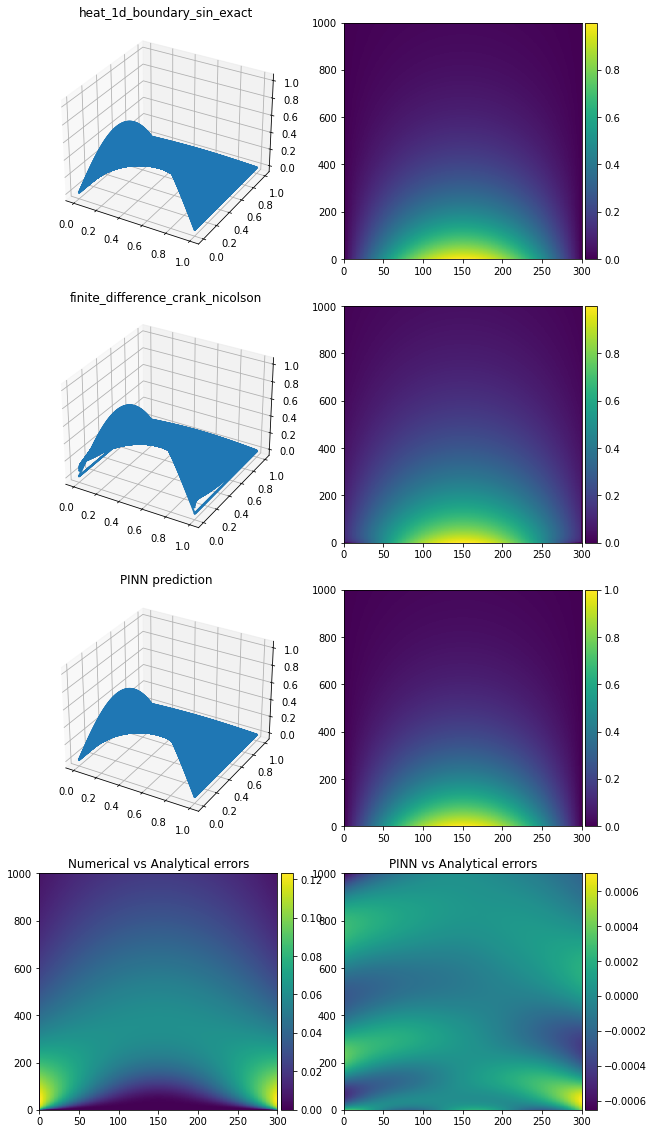

In [5]:
# A high resolution example where both should be good
const_params.test_x_dim = 300
const_params.test_t_dim = 1000
const_params.numerical_function_name = "finite_difference_crank_nicolson"

solve_analytical_and_numerical(const_params)
predict_and_output_report(const_params, model)


heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0001 seconds
finite_difference_euler: Average time with 25 tries: 0.0002 seconds
PINN prediction: Average time with 25 tries: 0.0003 seconds
---Performance measured wrt analytical solution---
Mean residual: 0.2890285
L2 relative error: 0.0007169429326834335
--- Report ---
Mean absolute error:  0.0001232296102514296
Mean squared error:  2.8727105054840655e-08
Max error:  0.000700786709785357
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 7
test_t_dim: 100
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_euler



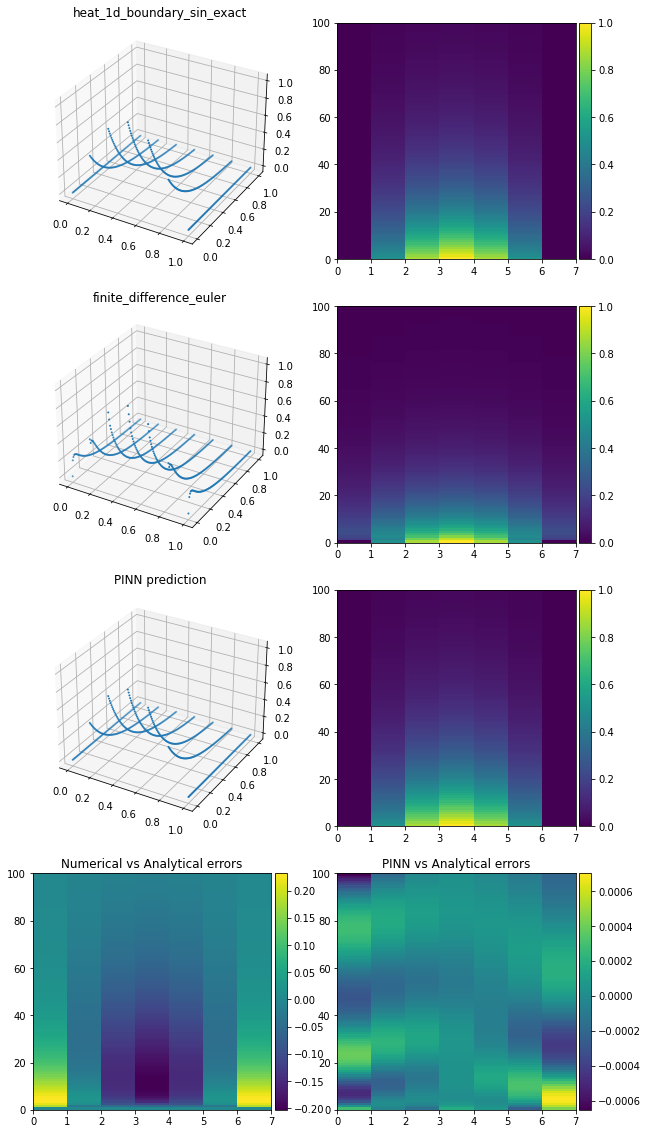

In [7]:
# Find some good numerical solution

const_params.test_x_dim = 7
const_params.test_t_dim = 100
const_params.numerical_function_name = "finite_difference_euler"

solve_analytical_and_numerical(const_params)
predict_and_output_report(const_params, model)

heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0002 seconds
finite_difference_euler: Average time with 25 tries: 0.0002 seconds
PINN prediction: Average time with 25 tries: 0.0005 seconds
---Performance measured wrt analytical solution---
Mean residual: 0.3352851
L2 relative error: 0.0005661465287311384
--- Report ---
Mean absolute error:  0.00010609846082298387
Mean squared error:  2.0202444253063332e-08
Max error:  0.000700786709785357
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 30
test_t_dim: 100
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_euler



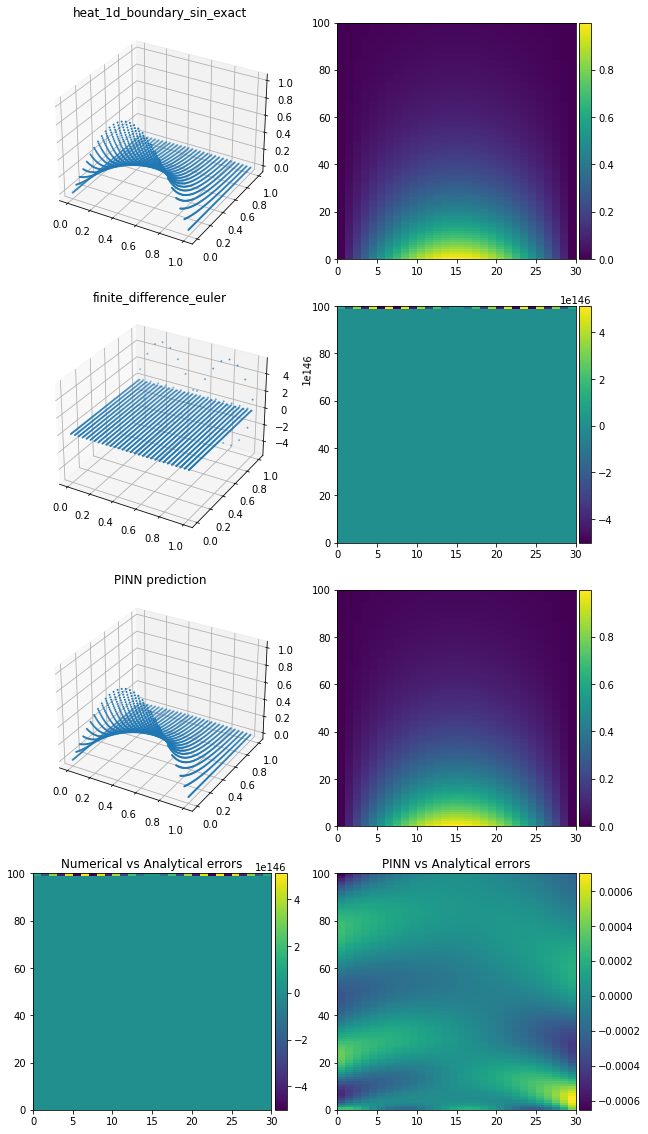

In [10]:
# Find bad numerical solution

const_params.test_x_dim = 30
const_params.test_t_dim = 100
const_params.numerical_function_name = "finite_difference_euler"

solve_analytical_and_numerical(const_params)
predict_and_output_report(const_params, model)